In [4]:
import os
import toml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
plt.style.use(['science','ieee'])

In [8]:
import tikzplotlib



### SC = IOU*Conf

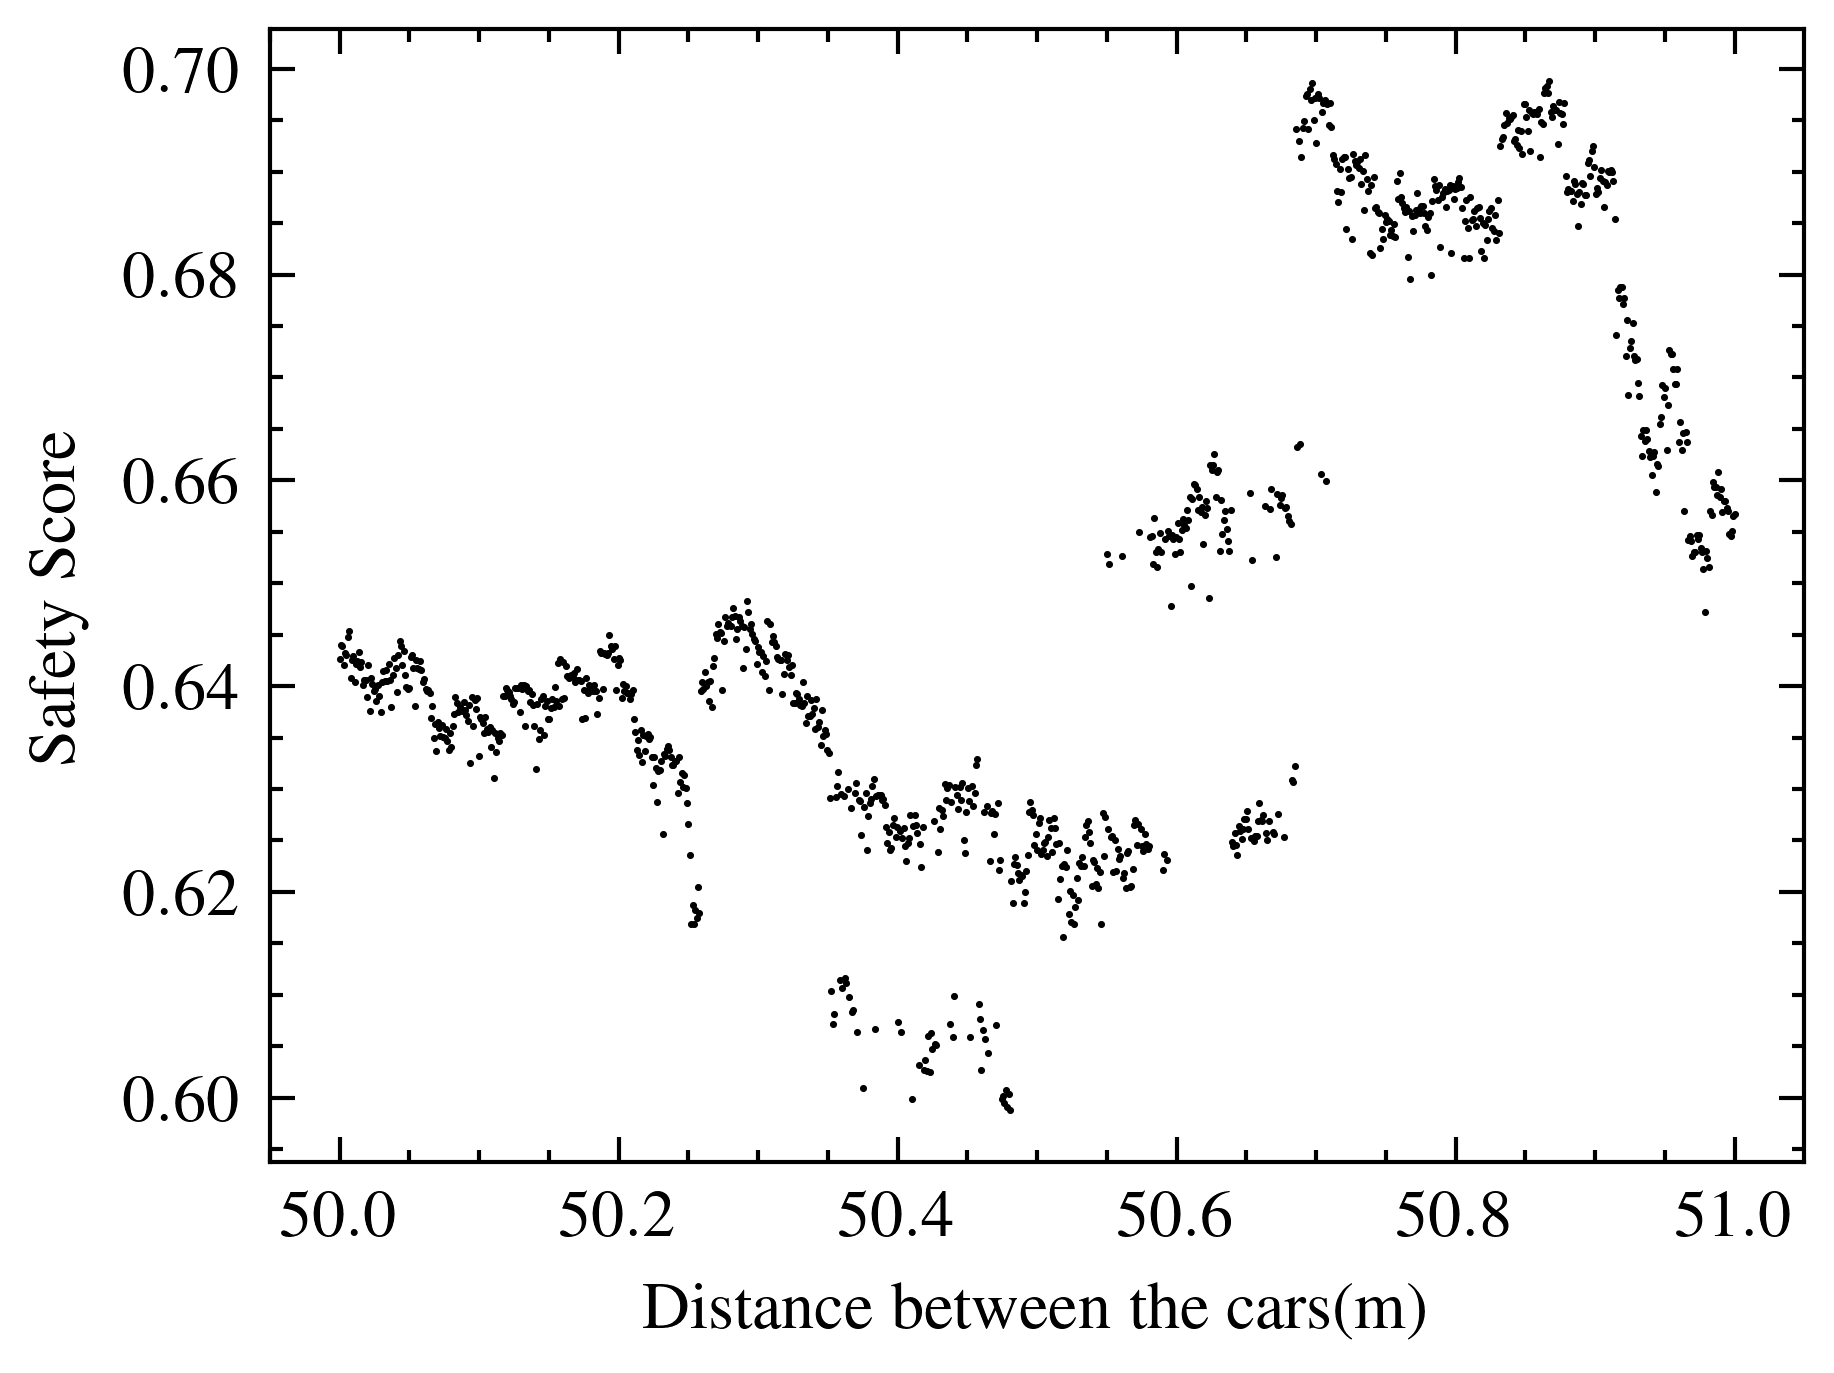

In [14]:
instances_path = r"D:\Studium\Darmstadt\Folien\SS2022\hiwi\TestRun\Test526\instances"
basepaths = np.linspace(50,51,1025)
sc_set = []
for basepath in basepaths:
    with open(os.path.join(instances_path,'[{:1}].toml'.format(basepath))) as ff:
        results = toml.load(ff)
        sc_set.append(float(results['results']['safetyscore']))
#plt.figure(figsize=(10, 10))
plt.scatter(basepaths, sc_set, linewidth=0.3, s=0.3)
plt.xlabel('Distance between the cars(m)')
plt.ylabel('Safety Score')
#plt.title('Scatter plot of distance between 50-51m')



tikzplotlib.save("test.tikz")
#plt.savefig('50-51m/safety_score.png', dpi=600)

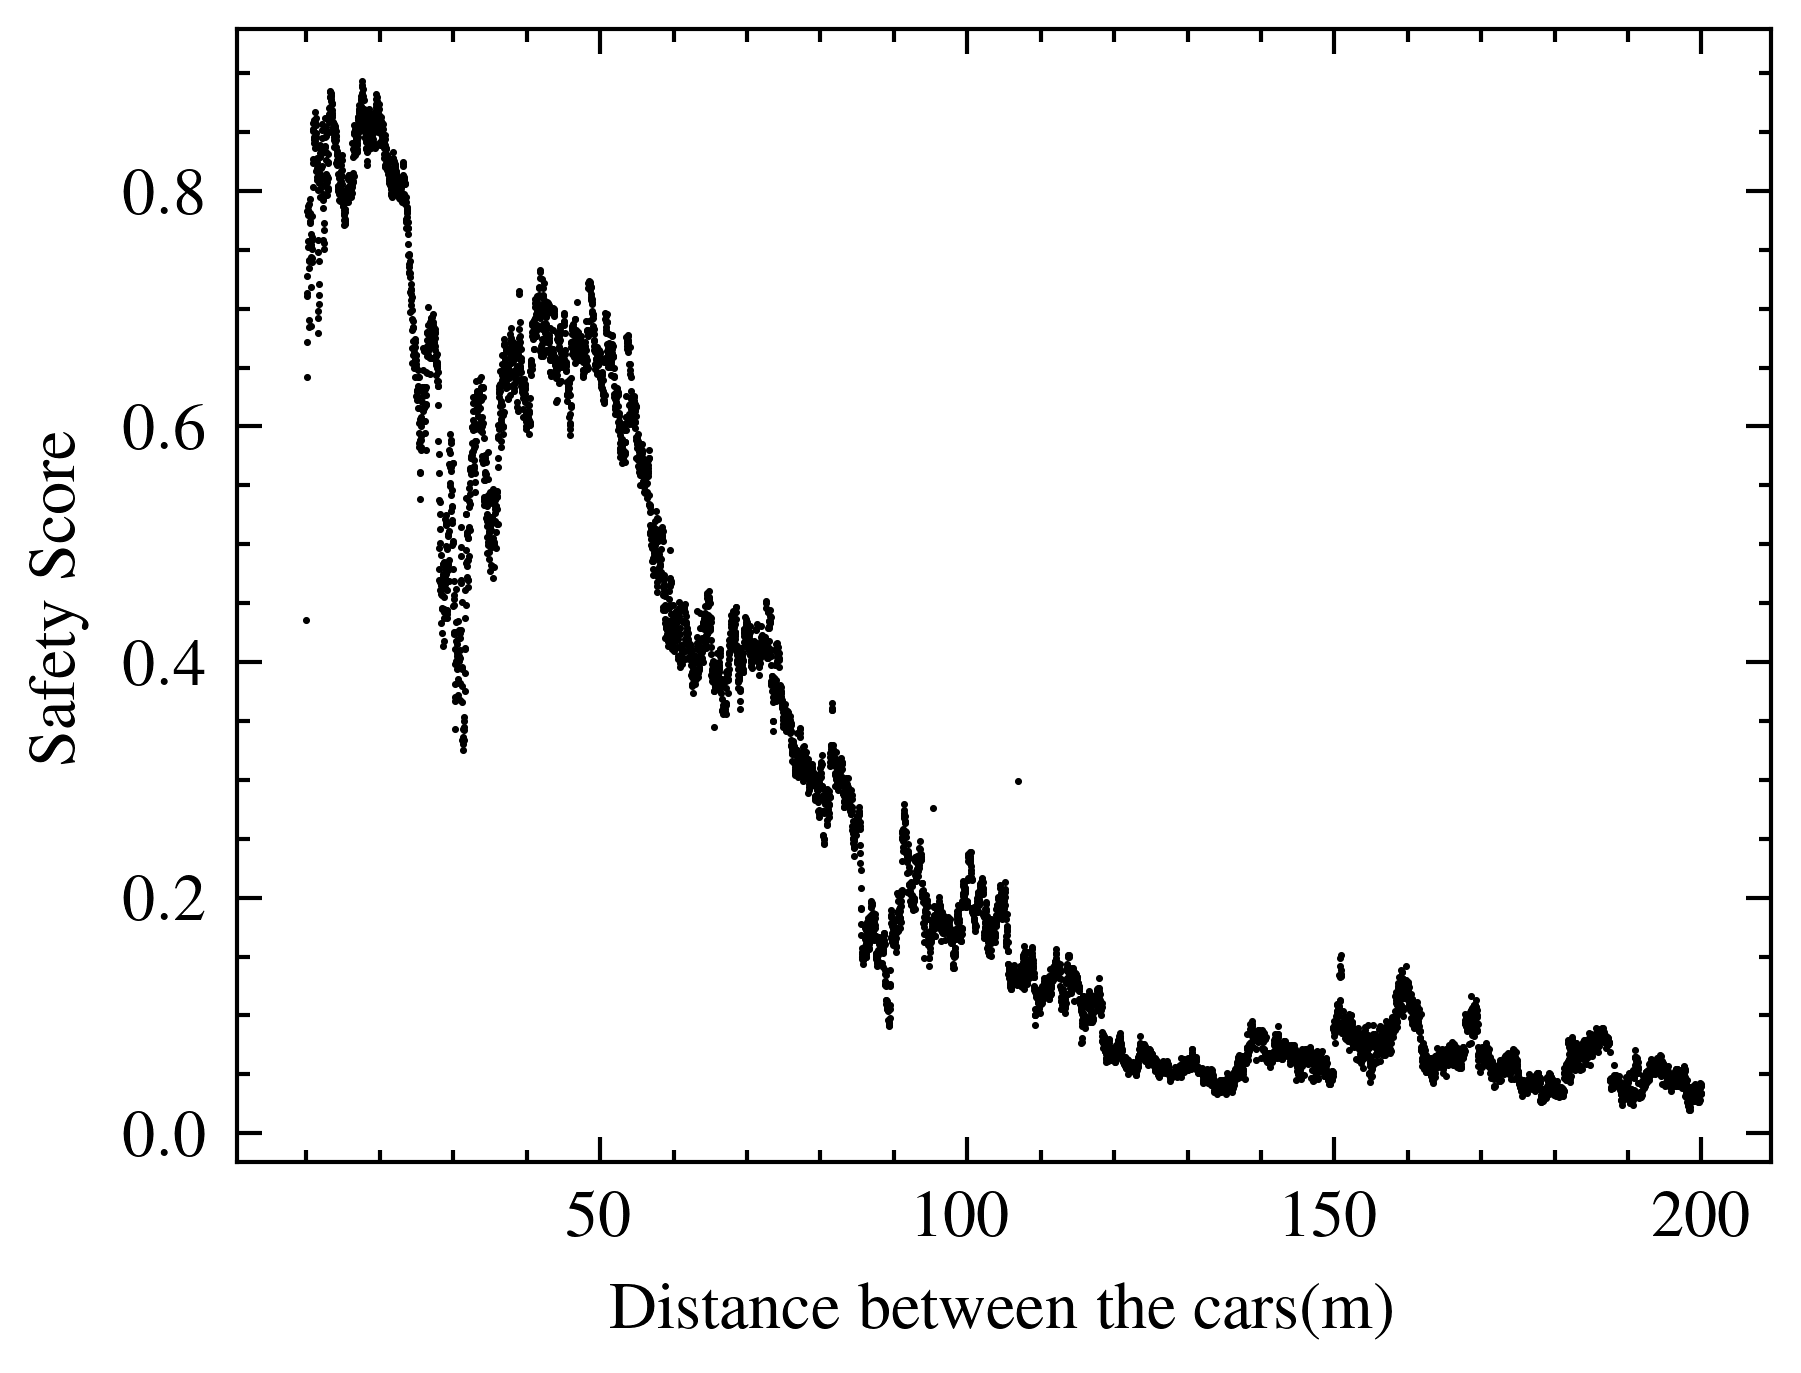

In [11]:
instances_path = r"D:\Studium\Darmstadt\Folien\SS2022\hiwi\TestRun\Test514\instances"
basepaths = np.linspace(10,200, 8193)
sc_set = []
for basepath in basepaths:
    with open(os.path.join(instances_path,'[{:1}].toml'.format(basepath))) as ff:
        results = toml.load(ff)
        sc_set.append(float(results['results']['safetyscore']))
#plt.figure(figsize=(10, 10))
plt.scatter(basepaths, sc_set, linewidth=0.3, s=0.3)
plt.xlabel('Distance between the cars(m)')
plt.ylabel('Safety Score')
#plt.title('Scatter plot of distance between 50-51m')
#plt.savefig('10-200m/safety_score.png', dpi=600)
tikzplotlib.save("test_all.tex")

### P_sum (50-51m)

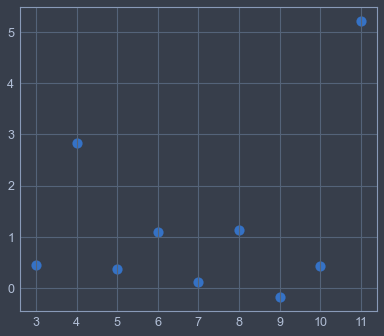

In [7]:
p_set = []
for i in range(3,12):
    grid_path = "C:\Arbeit\Carmaker_test\Data\TestRun\Test526\grid" + '{:02d}'.format(i) + ".toml"
    with open(grid_path) as toml_file:
        results = toml.load(toml_file)
        p_set.append(results['evaluation']['p_sum'])
grid = list(range(3,12))
plt.scatter(grid, p_set, s=100)

### P jede Punkt

In [43]:
bins = list(np.linspace(-10,10,41))
plt.figure(figsize=(20,20))
for i in range(3,15):
    grid_path = "C:\Arbeit\Carmaker_test\Data\Testrun\Test514\grid" + '{:02d}'.format(i) + ".toml"
    with open(grid_path) as toml_file:
        results = toml.load(toml_file)
        p = results['evaluation']['p']
        plt.subplot(4, 4, i-2)
        plt.hist(x=p, bins=bins, color="steelblue", density=True, edgecolor="black")
        plt.xlabel("P_grid"+"{:02d}".format(i))  
        plt.ylabel("Frequency")
#plt.suptitle('Histograms of P for grid 03-11')
#plt.savefig('P_hist', dpi=600)

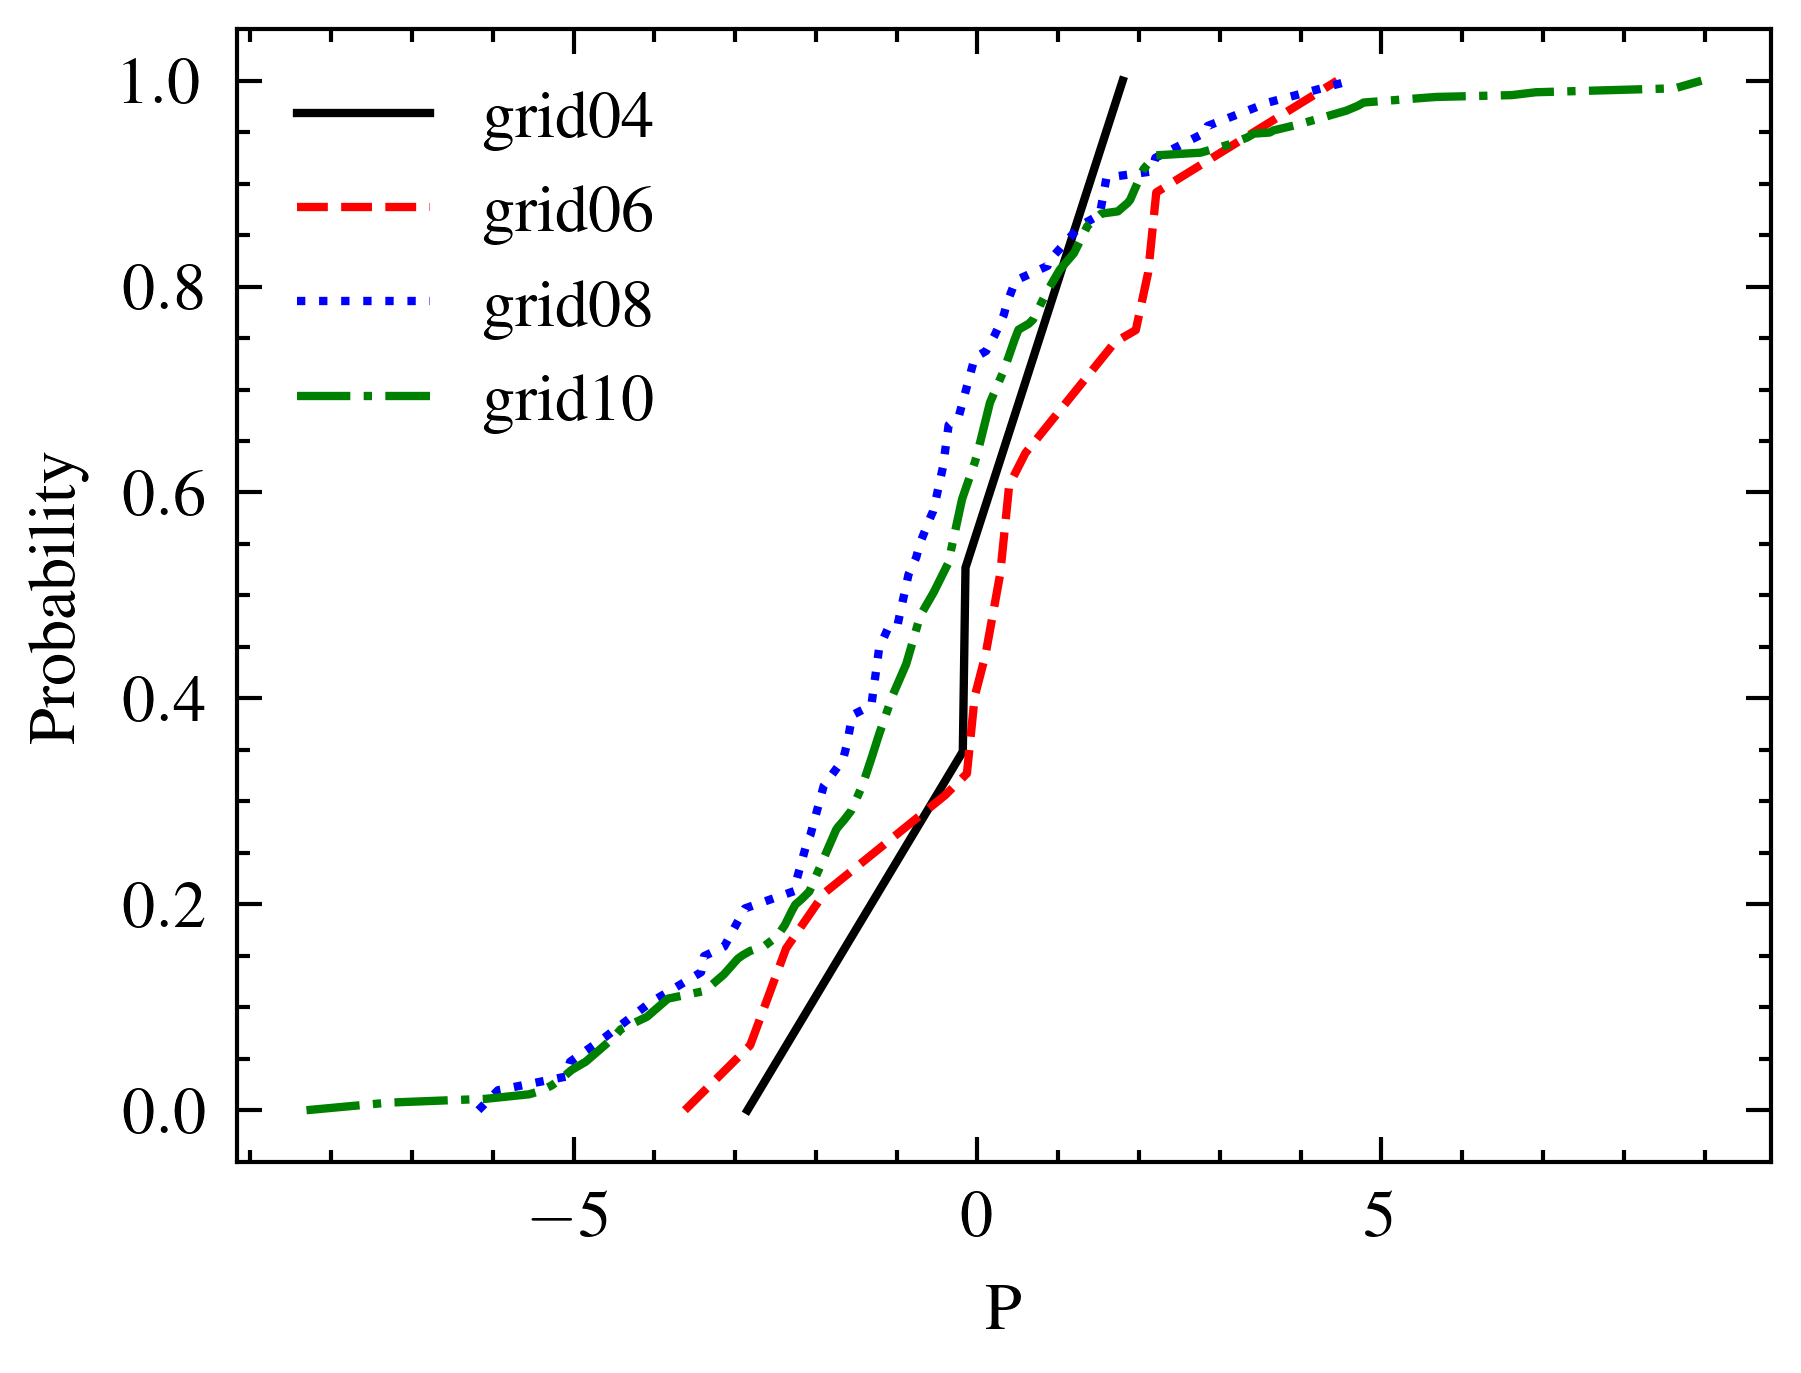

In [36]:
#plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
for i in range(4,12,2):
    grid_path = "C:\Arbeit\Carmaker_test\Data\Testrun\Test526\grid" + '{:02d}'.format(i) + ".toml"
    with open(grid_path) as toml_file:
        results = toml.load(toml_file)
        p = results['evaluation']['p']
        p.sort()
        hist = np.histogram(p, bins=100)
        hist_dist = ss.rv_histogram(hist)
        ax.plot(p, hist_dist.cdf(p), label='grid'+'{:02d}'.format(i))
        plt.xlabel('P')
        plt.ylabel('Probability')
        plt.legend()
        #plt.title('Cdf of P')
#plt.savefig('50-51m/P_cdf.png', dpi=600)
tikzplotlib.save("test_p_detail.tex")

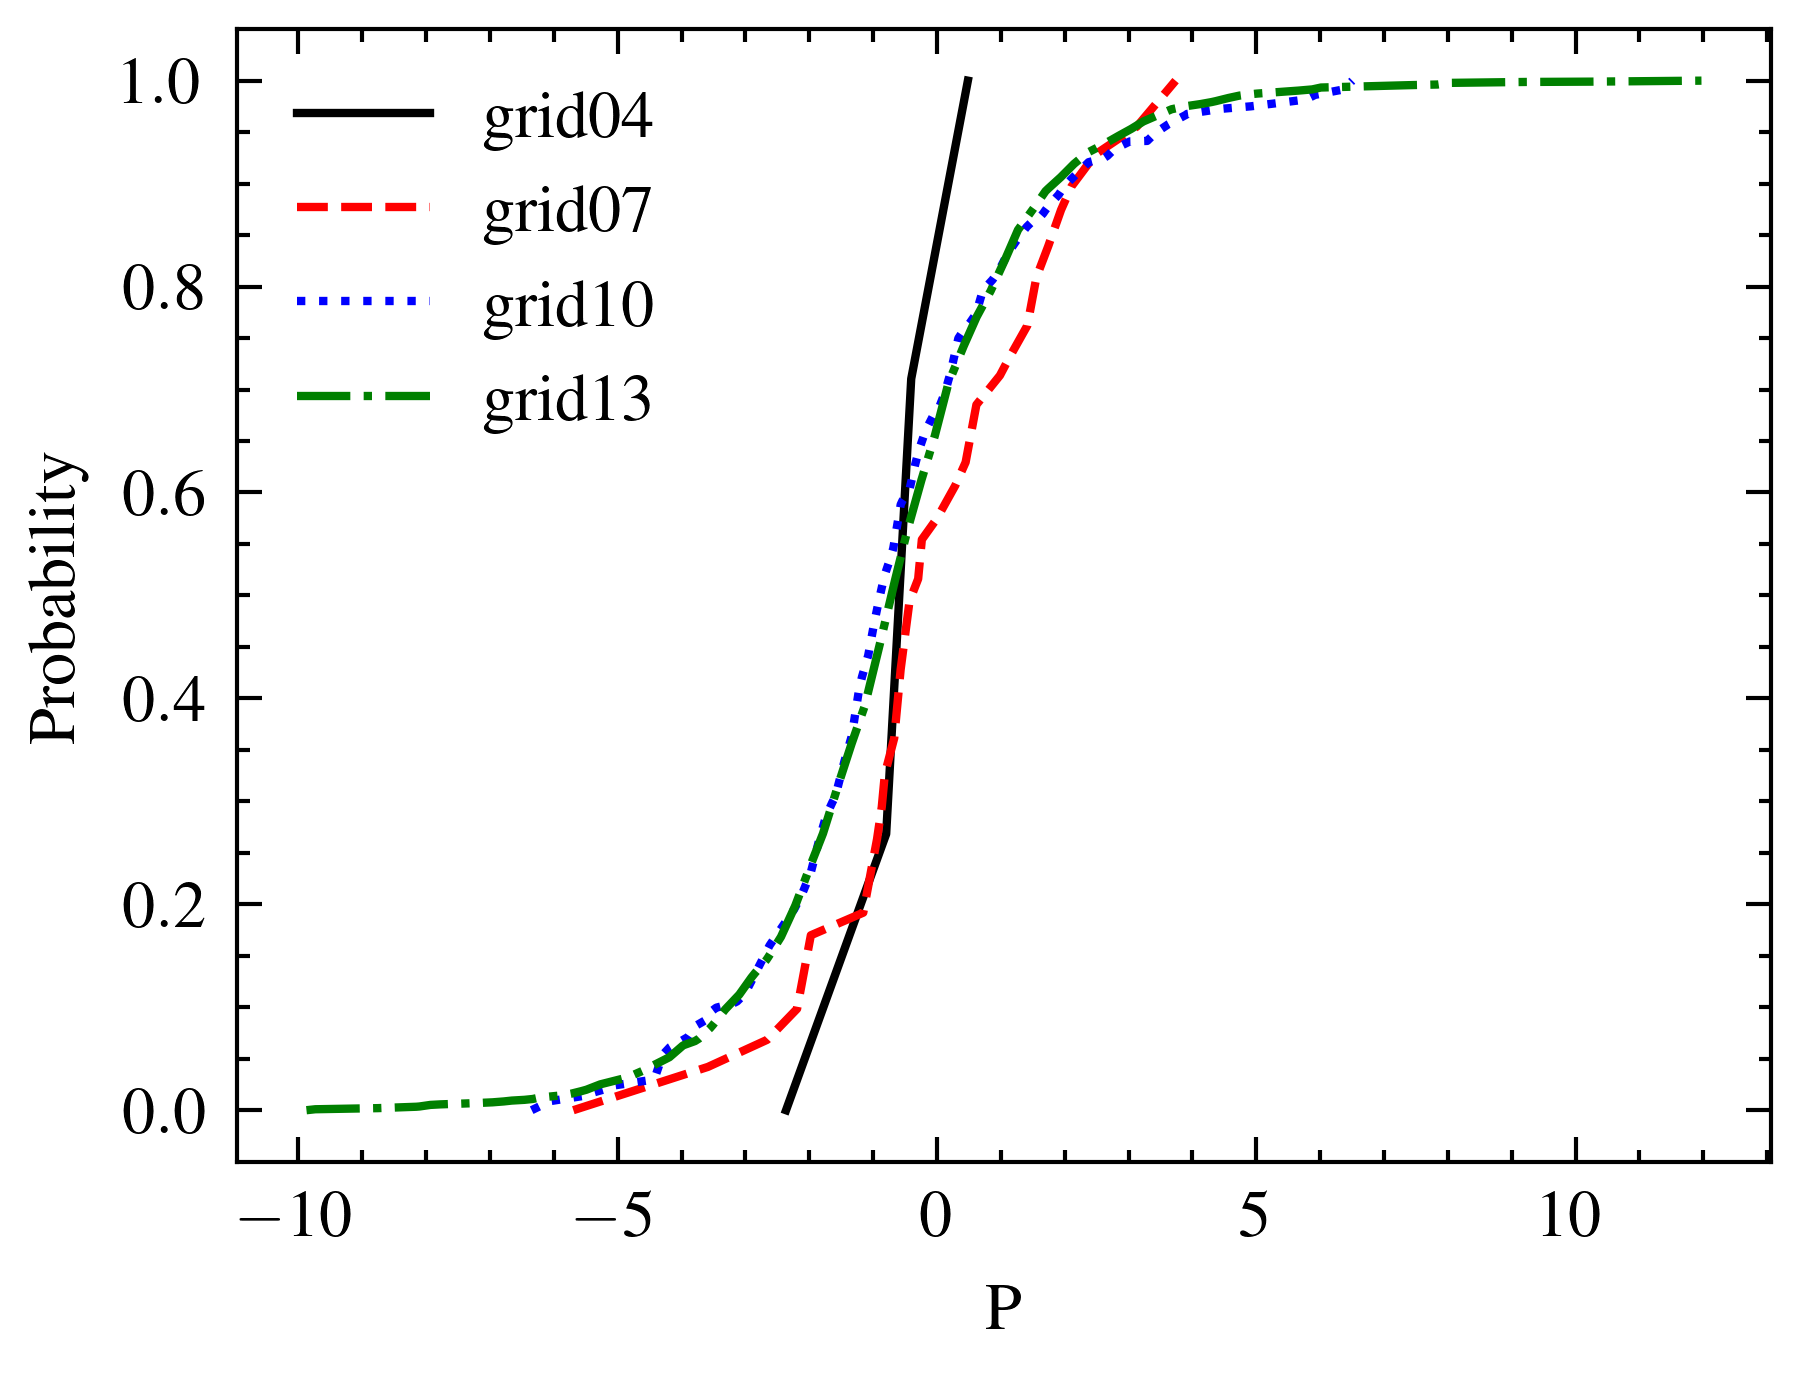

In [12]:
#plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
for i in range(4,15,3):
    grid_path = "C:\Arbeit\Carmaker_test\Data\Testrun\Test514\grid" + '{:02d}'.format(i) + ".toml"
    with open(grid_path) as toml_file:
        results = toml.load(toml_file)
        p = results['evaluation']['p']
        p.sort()
        hist = np.histogram(p, bins=100)
        hist_dist = ss.rv_histogram(hist)
        ax.plot(p, hist_dist.cdf(p), label='grid'+'{:02d}'.format(i))
        plt.xlabel('P')
        plt.ylabel('Probability')
        plt.legend()
        #plt.title('Cdf of P')
#plt.savefig('10-200m/P_cdf.png', dpi=600)
tikzplotlib.save("cdf__p_all.tex")

### GCI/Δf

In [40]:
plt.figure(figsize=(20,20))
for i in range(3,15):
    grid_path = "C:\Arbeit\Carmaker_test\Data\TestRun\Test514\grid" + '{:02d}'.format(i) + ".toml"
    with open(grid_path) as toml_file:
        results = toml.load(toml_file)
        GCI = results['evaluation']['GCI']
        x = np.linspace(10,200,2**(i-1)+1)[1::2]
    plt.subplot(4, 4, i-2)
    plt.scatter(x, GCI, s=10)

In [67]:
plt.figure(figsize=(20,20))
for i in range(3,12):
    grid_path = "C:\Arbeit\Carmaker_test\Data\TestRun\Test526\grid" + '{:02d}'.format(i) + ".toml"
    with open(grid_path) as toml_file:
        results = toml.load(toml_file)
        GCI = results['evaluation']['GCI']
        x = np.linspace(50,51,2**(i-1)+1)[1::2]
    plt.subplot(4, 4, i-2)
    plt.scatter(x, GCI, s=10)

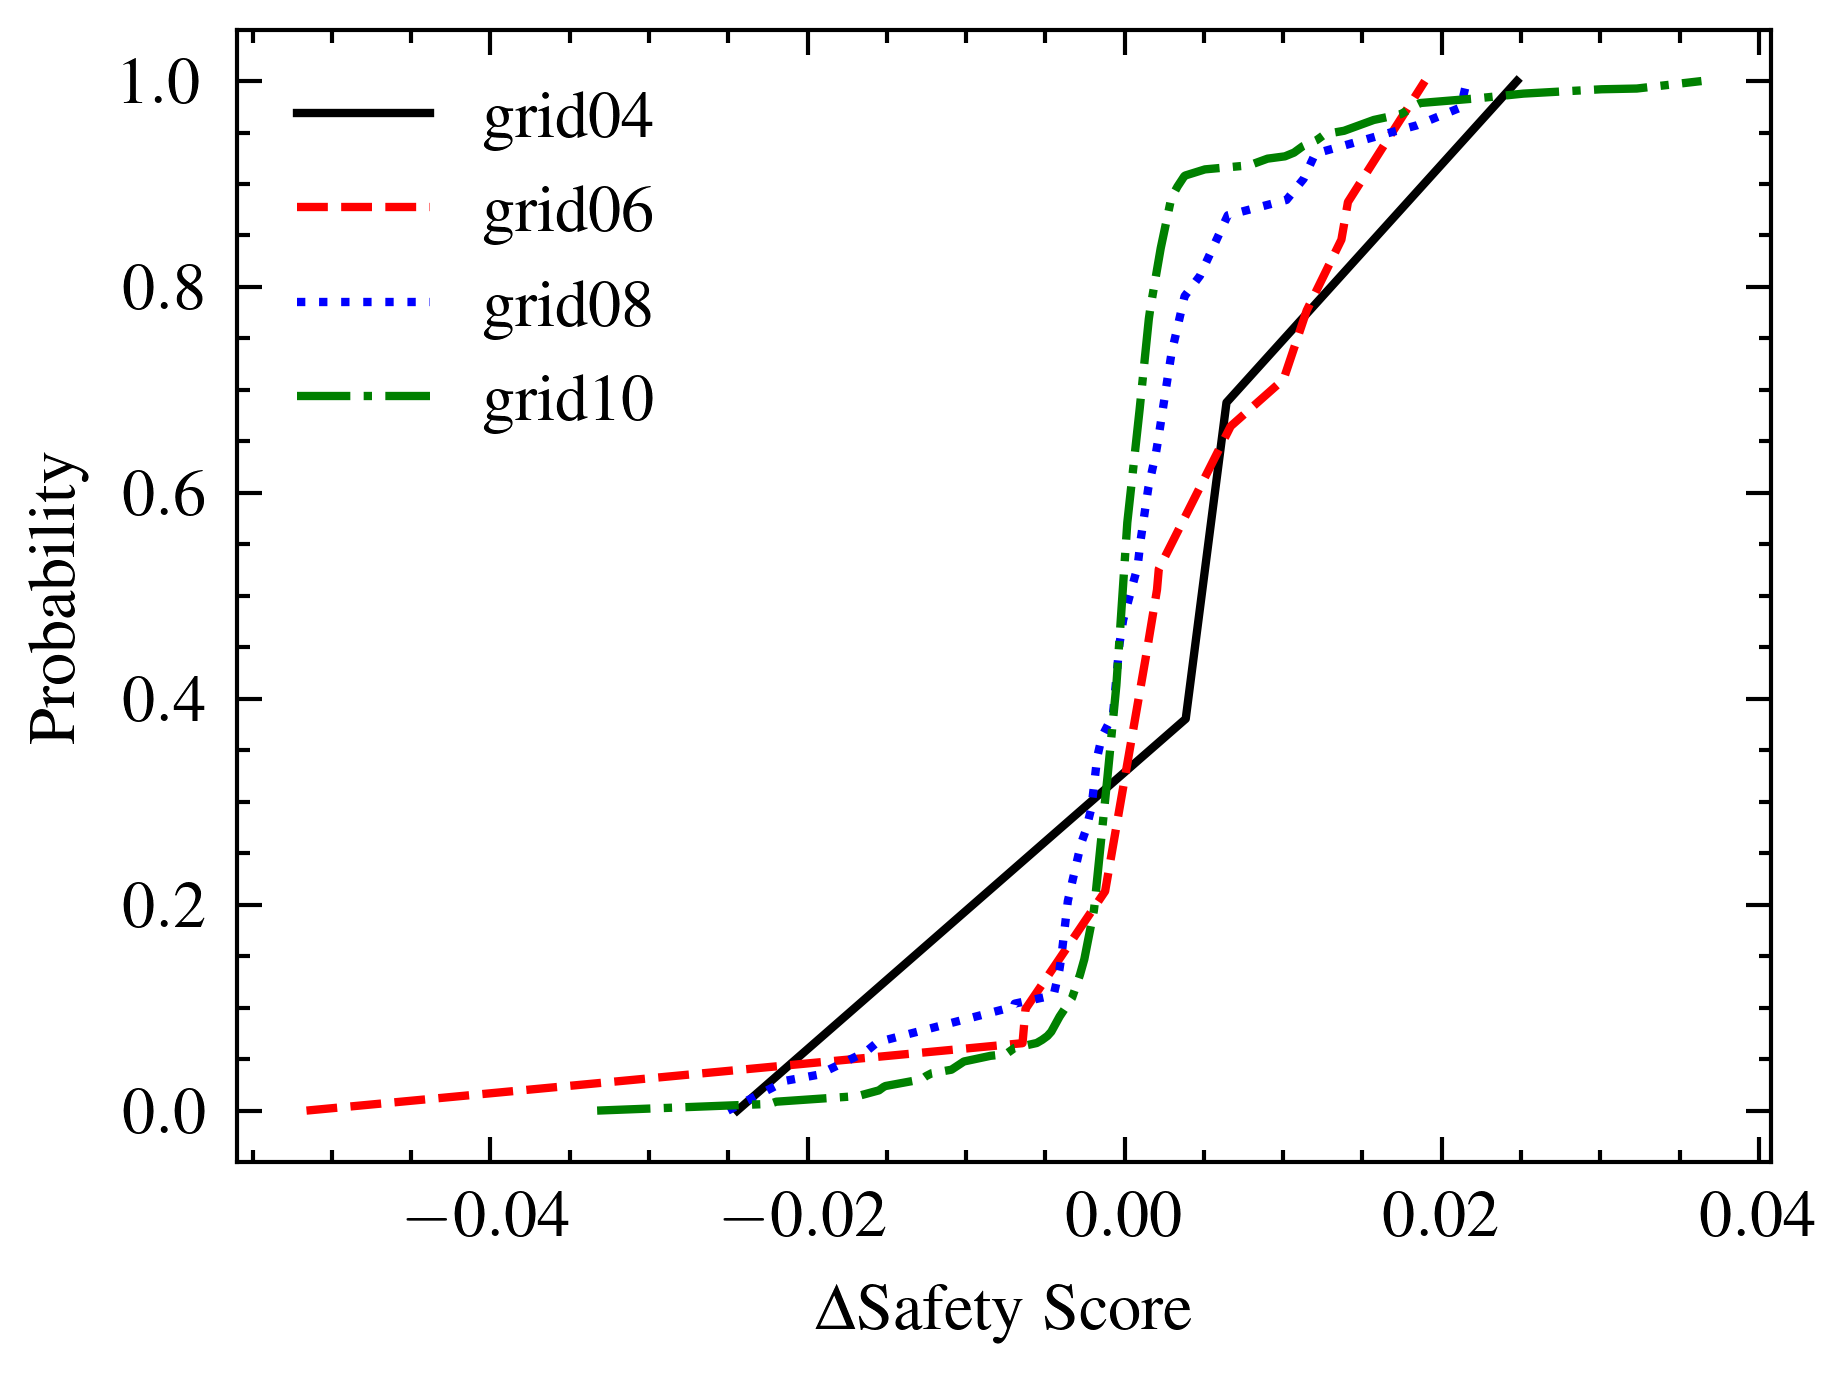

In [64]:
#plt.figure(figsize=(13,13))
fig, ax = plt.subplots()
for i in range(4,12,2):
    grid_path = "C:\Arbeit\Carmaker_test\Data\Testrun\Test526\grid" + '{:02d}'.format(i) + ".toml"
    with open(grid_path) as toml_file:
        results = toml.load(toml_file)
        GCI = results['evaluation']['GCI']
        GCI.sort()
        hist = np.histogram(GCI, bins=100)
        hist_dist = ss.rv_histogram(hist)
        ax.plot(GCI, hist_dist.cdf(GCI), label='grid'+'{:02d}'.format(i))
        plt.xlabel('$\Delta$Safety Score')
        plt.ylabel('Probability')
        plt.legend()
        #plt.title('Cdf of GCI')
plt.savefig('50-51m/GCI_cdf.png',dpi=600)

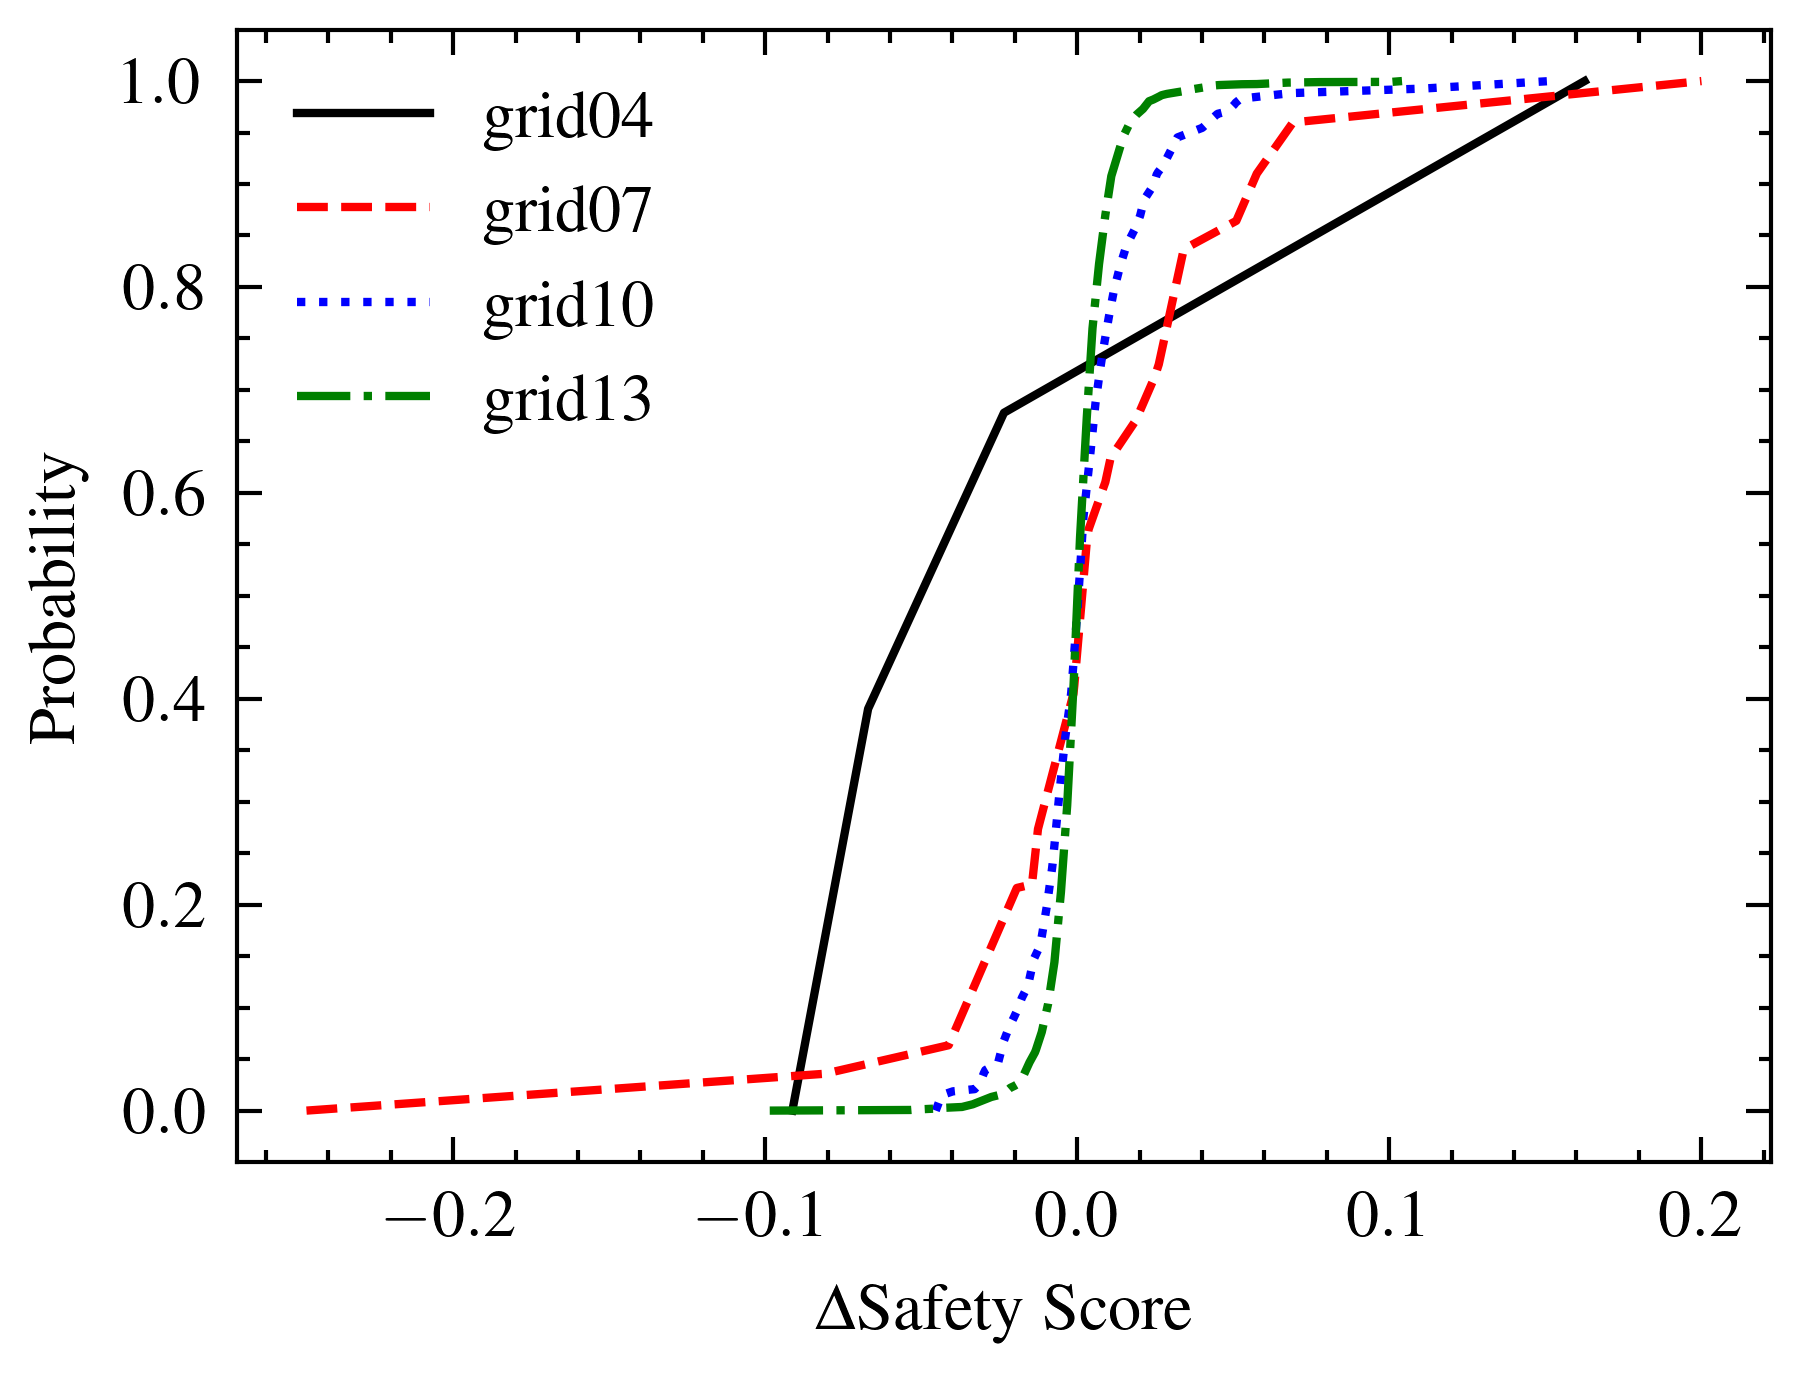

In [13]:
#plt.figure(figsize=(13,13))
fig, ax = plt.subplots()
for i in range(4,15,3):
    grid_path = "C:\Arbeit\Carmaker_test\Data\Testrun\Test514\grid" + '{:02d}'.format(i) + ".toml"
    with open(grid_path) as toml_file:
        results = toml.load(toml_file)
        GCI = results['evaluation']['GCI']
        GCI.sort()
        hist = np.histogram(GCI, bins=100)
        hist_dist = ss.rv_histogram(hist)
        ax.plot(GCI, hist_dist.cdf(GCI), label='grid'+'{:02d}'.format(i))
        plt.xlabel('$\Delta$Safety Score')
        plt.ylabel('Probability')
        plt.legend()
        #plt.title('Cdf of GCI')
#plt.savefig('10-200m/GCI_cdf.png',dpi=600)
tikzplotlib.save("cdf__GCI_all.tex")

Fog

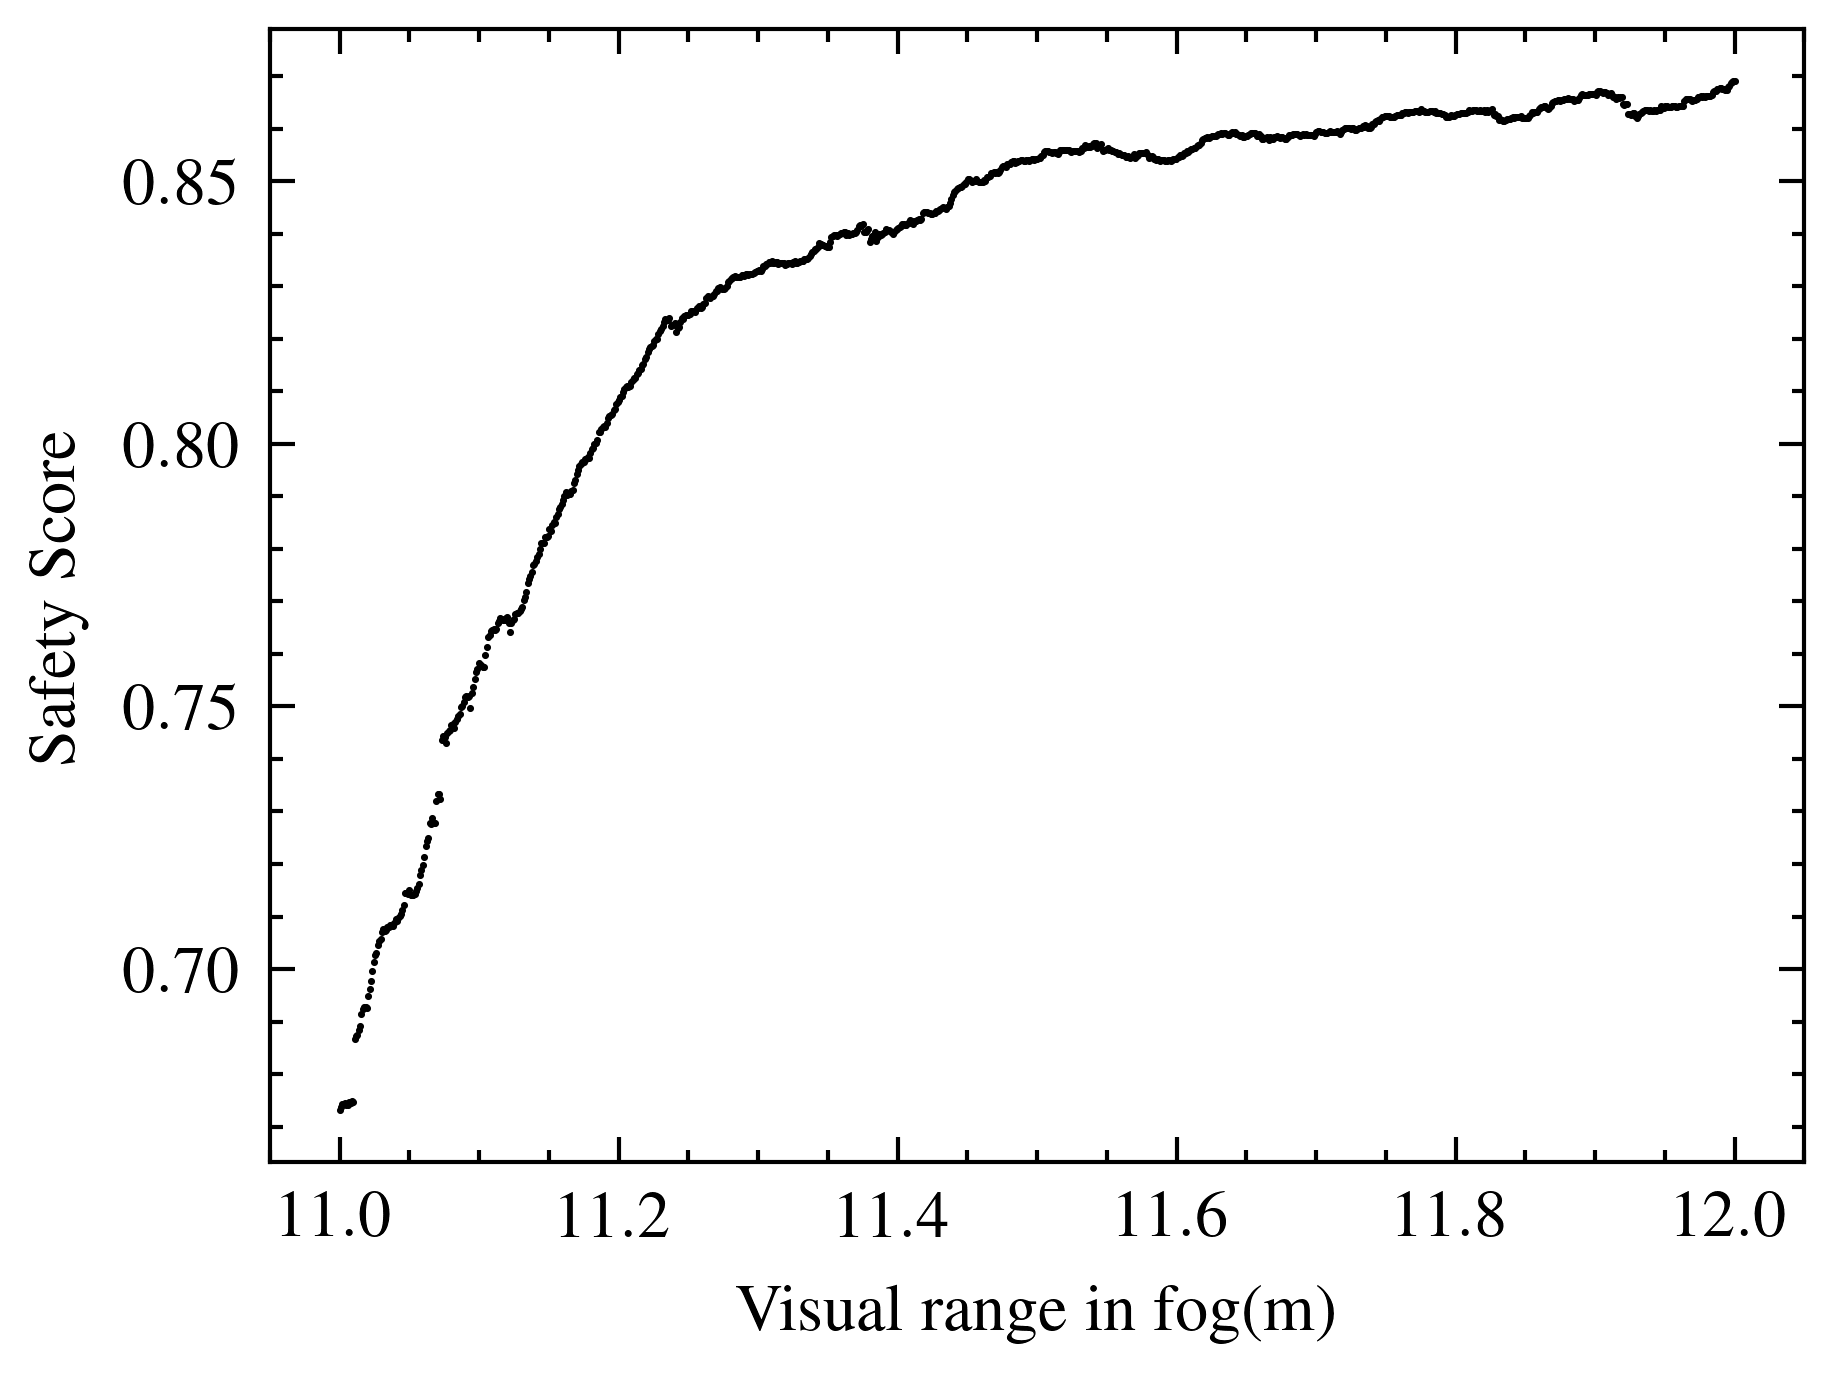

In [3]:
instances_path = r"C:\Arbeit\Carmaker_test\Data\TestRun\Testfog\instances"
basepaths = np.linspace(11,12, 1025)
sc_set = []
for basepath in basepaths:
    with open(os.path.join(instances_path,'[{:1}].toml'.format(basepath))) as ff:
        results = toml.load(ff)
        sc_set.append(float(results['results']['safetyscore']))
#plt.figure(figsize=(10, 10))
plt.scatter(basepaths, sc_set, linewidth=0.3, s=0.3)
plt.xlabel('Visual range in fog(m)')
plt.ylabel('Safety Score')
plt.savefig('Fog/safety_score.png', dpi=600)

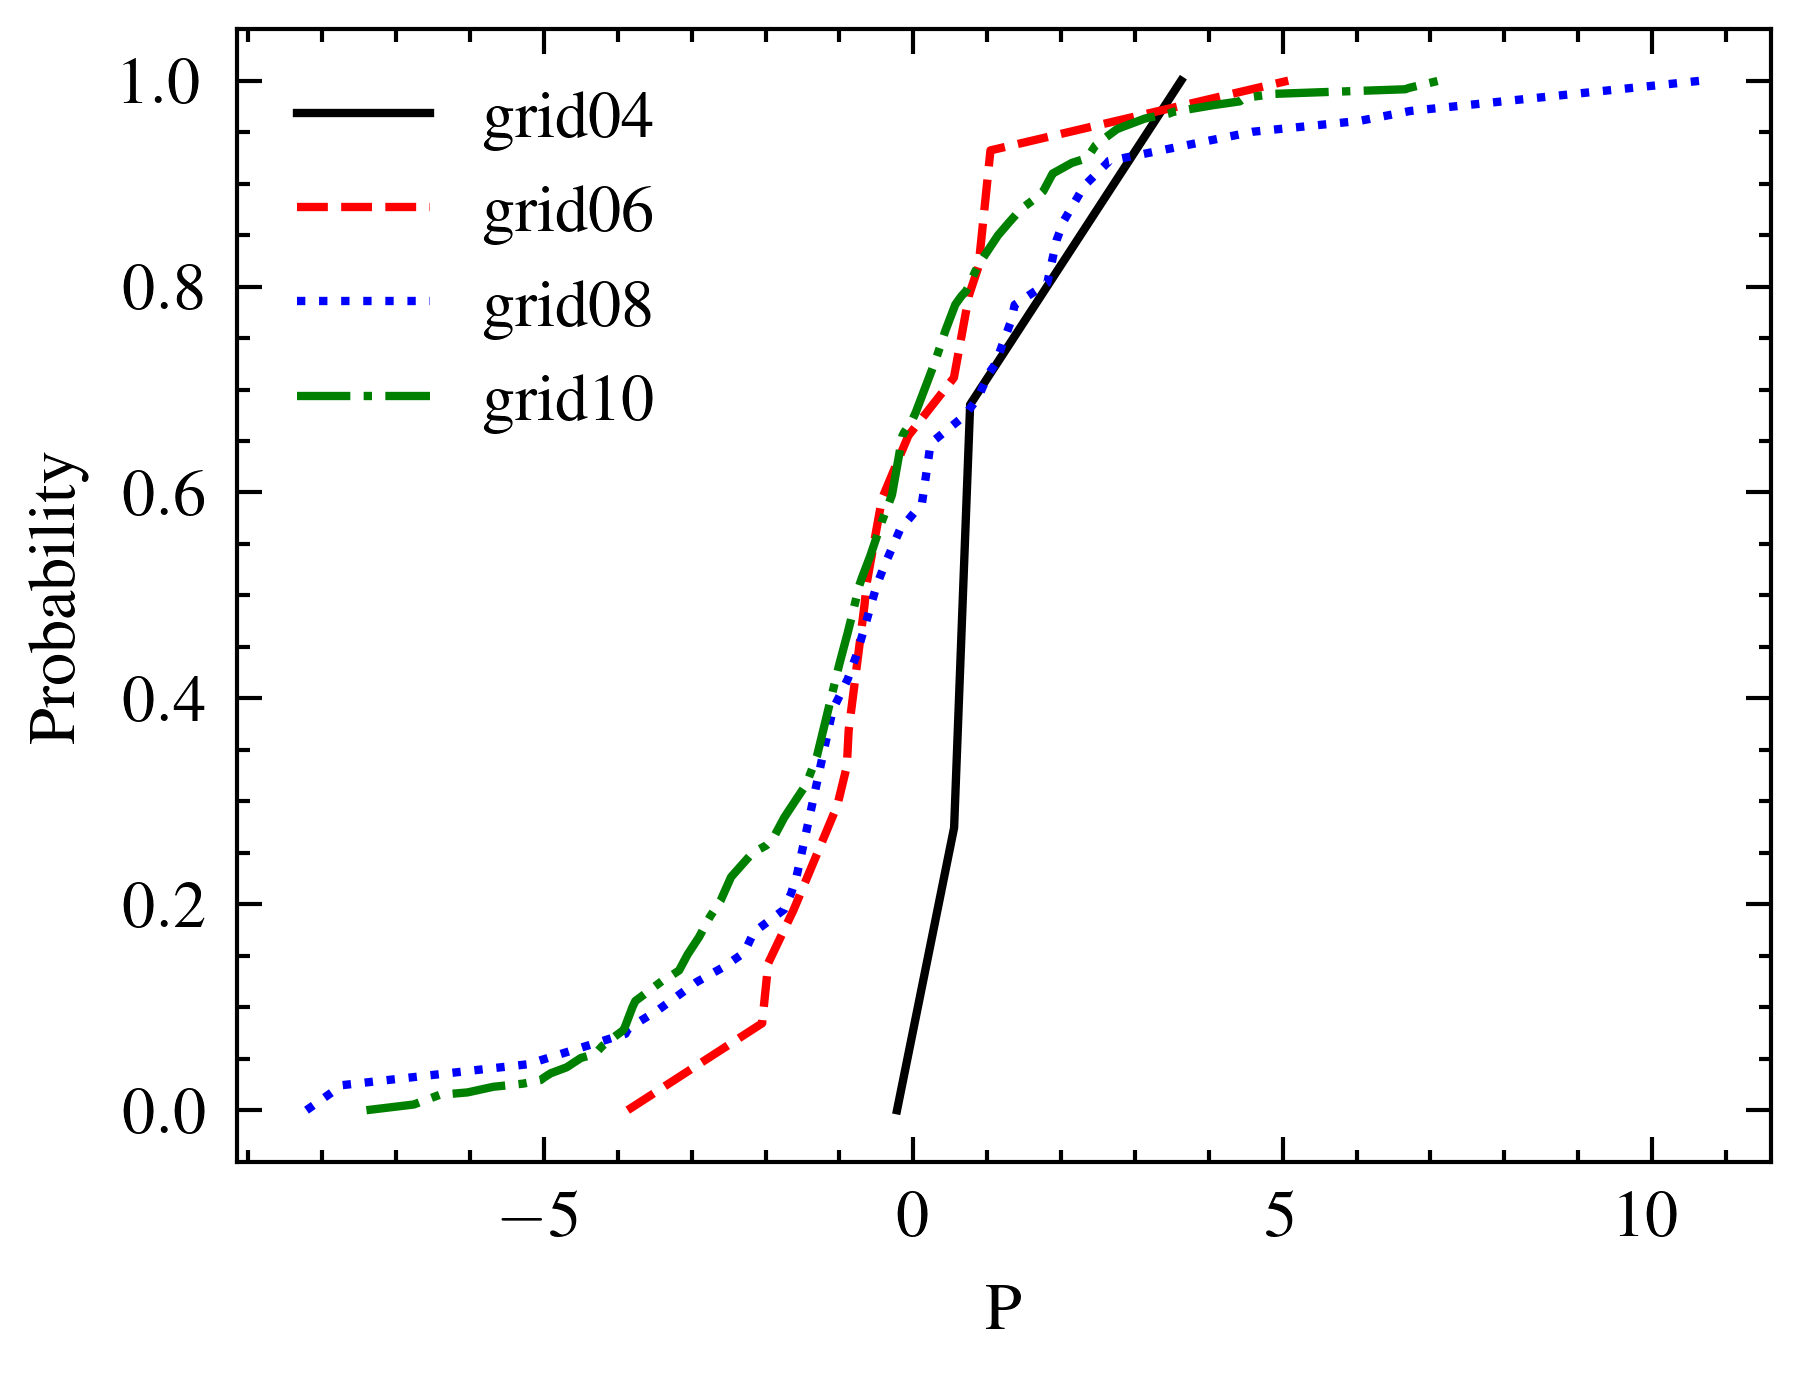

In [4]:
fig, ax = plt.subplots()
for i in range(4,12,2):
    grid_path = "C:\Arbeit\Carmaker_test\Data\Testrun\Testfog\grid" + '{:02d}'.format(i) + ".toml"
    with open(grid_path) as toml_file:
        results = toml.load(toml_file)
        p = results['evaluation']['p']
        p.sort()
        hist = np.histogram(p, bins=100)
        hist_dist = ss.rv_histogram(hist)
        ax.plot(p, hist_dist.cdf(p), label='grid'+'{:02d}'.format(i))
        plt.xlabel('P')
        plt.ylabel('Probability')
        plt.legend()
        #plt.title('Cdf of P')
plt.savefig('Fog/P_cdf.png', dpi=600)

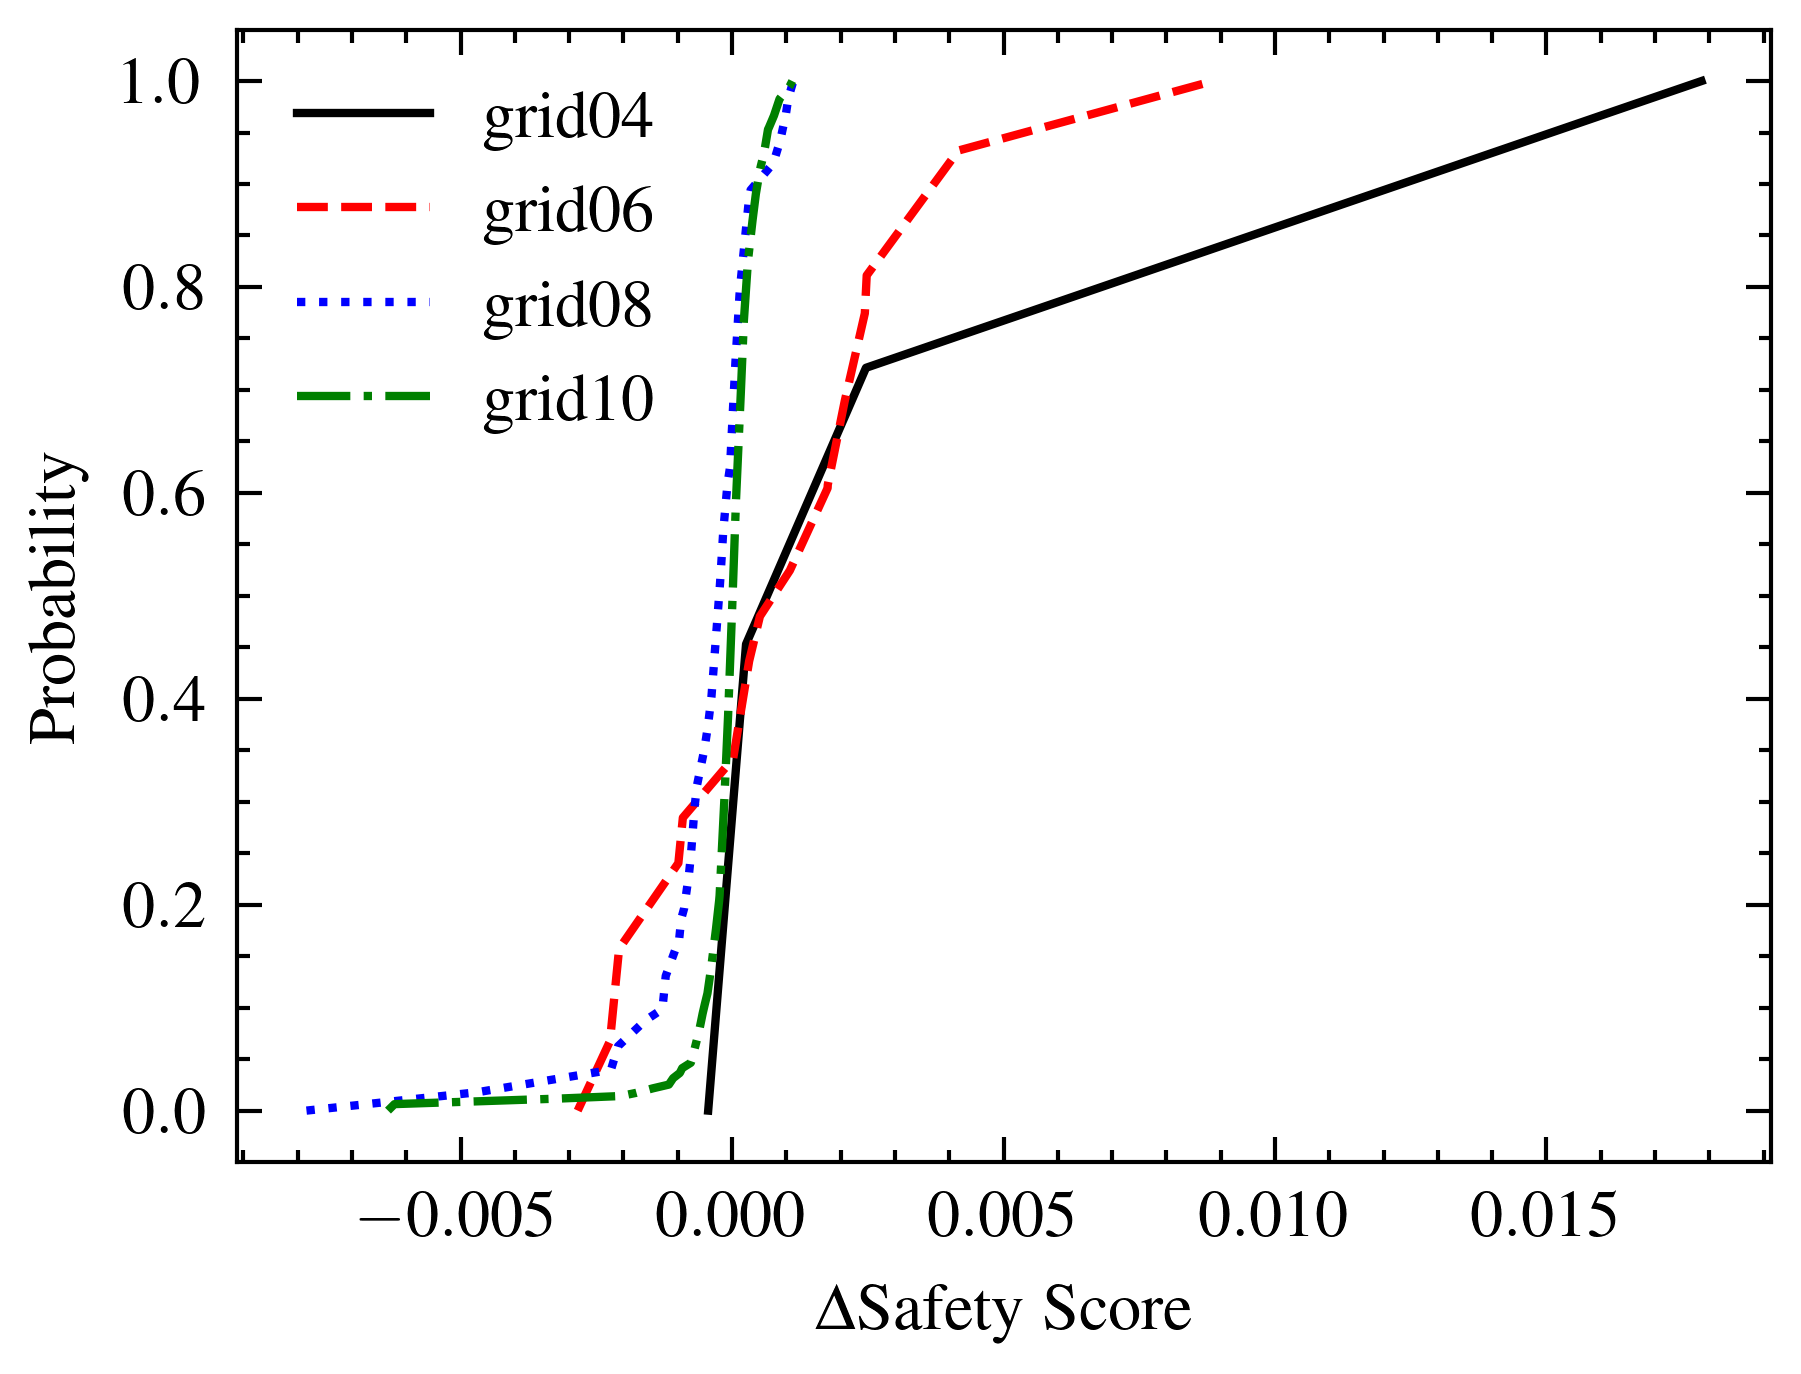

In [5]:
fig, ax = plt.subplots()
for i in range(4,12,2):
    grid_path = "C:\Arbeit\Carmaker_test\Data\Testrun\Testfog\grid" + '{:02d}'.format(i) + ".toml"
    with open(grid_path) as toml_file:
        results = toml.load(toml_file)
        GCI = results['evaluation']['GCI']
        GCI.sort()
        hist = np.histogram(GCI, bins=100)
        hist_dist = ss.rv_histogram(hist)
        ax.plot(GCI, hist_dist.cdf(GCI), label='grid'+'{:02d}'.format(i))
        plt.xlabel('$\Delta$Safety Score')
        plt.ylabel('Probability')
        plt.legend()
        #plt.title('Cdf of GCI')
plt.savefig('Fog/GCI_cdf.png',dpi=600)